<class 'numpy.ndarray'> <class 'list'>


array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456,
       9.69584628, 7.75132823, 9.39498942, 8.9482735 , 5.97899979,
       9.21874235, 0.88492502, 1.95982862, 0.45227289, 3.25330331,
       3.8867729 , 2.71349032, 8.28737509, 3.56753327, 2.8093451 ,
       5.42696083, 1.40924225, 8.02196981, 0.74550644, 9.86886937,
       7.72244769, 1.98715682, 0.05522117, 8.15461428, 7.06857

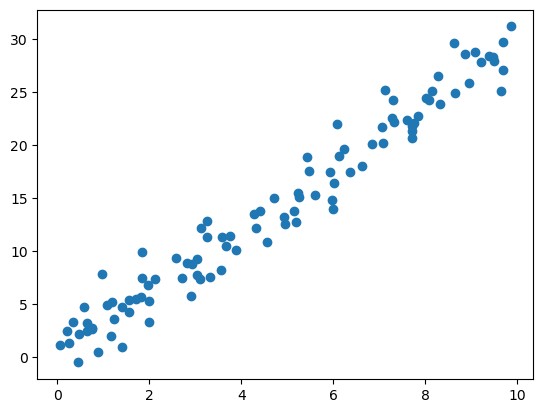

In [71]:
#导入库
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 魔法命令后面不能直接添加注释
# 魔法命令，让Matplotlib绘制的图表直接嵌入到Notebook的输出单元格中，而不是弹出一个单独的窗口。
import pandas as pd

#导入数据
np.random.seed(42)
x1 = np.random.uniform(low=0,high=10,size=100)#行向量
x2 = [xi*3+np.random.normal(0,2) for xi in x1]#行
print(type(x1),type(x2))
plt.scatter(x1,x2);

In [61]:
#计算均值并减去均值
data = pd.DataFrame([x1,x2]).transpose()#转置
data.columns = ['x1', 'x2']
#data.head()
data_sub_mean = data-data.mean()

In [85]:
#计算协方差矩阵
data_cov = 1/99*np.dot(data_sub_mean.transpose().values,data_sub_mean.values)#转换为np再点乘
#注意这里是样本方差的计算方法,是1/(n-1)
data_cov   #numpy.ndarray
#也可以这样算
# cov = np.cov([data_sub_mean['x1'], data_sub_mean['x2']])

numpy.ndarray

In [91]:
#计算特征向量和特征值
eigenvalues, eigenvectors = np.linalg.eig(data_cov)
print(eigenvalues)#也就找到了其相似对角化的对角矩阵，主要是特征2
print(eigenvectors)
eigenvalues[1]/sum(eigenvalues)

[ 0.33297363 86.61794719]
[[-0.94936397 -0.31417837]
 [ 0.31417837 -0.94936397]]


0.9961705566054647

In [103]:
#特征降维，最后的结果
indices = np.argsort(eigenvalues)[::-1]#返回索引的降序排序
#对特征向量按照特征值降序排序
eigenvectors_f = eigenvectors[:,indices]
print(eigenvectors_f)
#派生新数据
transformed = data_sub_mean.dot(eigenvectors_f)#将原数据投影到新的方向上
print(transformed.head(5))
transformed2 = data_sub_mean.dot(eigenvectors_f[:,0])#将原数据投影到新的最大主成分方向上
print(transformed2.head(5))

[[-0.31417837 -0.94936397]
 [-0.94936397  0.31417837]]
           0         1
0   2.857085  0.061907
1 -14.630088 -0.220019
2  -8.455521  0.040458
3  -0.291012 -1.256997
4  10.349701 -0.115900
0     2.857085
1   -14.630088
2    -8.455521
3    -0.291012
4    10.349701
dtype: float64
